# Data cleaning

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

survey = pd.read_csv("survey.csv")

In [ ]:
survey.head()

In [147]:
steps = pd.read_csv("steps.csv", sep=";")

In [148]:
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df = pd.merge(survey, steps, on = "id")

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


/Applications/anaconda3/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


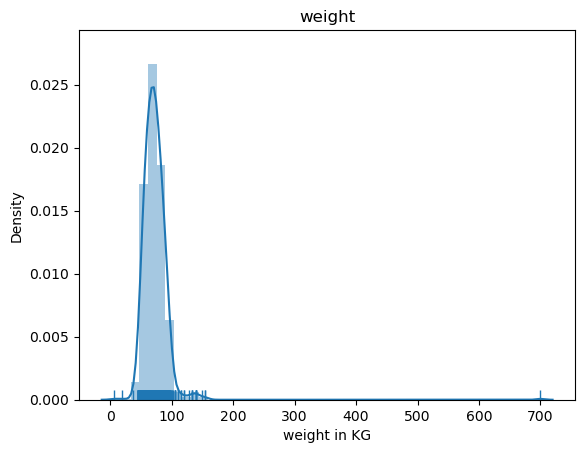

In [151]:
sns.distplot(df["weight"], rug=True)
plt.title("weight")
plt.xlabel("weight in KG")
plt.show()

In [152]:
#Cleaning the data from impossible values

df["weigth"] = df["weight"].apply(pd.to_numeric, errors="coerce")

def above_300(x):
    if(x > 300.0): 
        return float('NaN')
    else: 
        return x
df["weight"] = df["weight"].apply(above_300)


In [153]:
def below_40(x):
    if(x < 40.0): 
        return float('NaN')
    else: 
        return x
df["weight"] = df["weight"].apply(below_40)

In [154]:
df["weight"].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
102.0     1
116.0     1
128.0     1
115.0     1
101.0     1
Name: weight, Length: 68, dtype: int64

As illustrade above the impossible values are removed

In [155]:
mean_steps = df.iloc[:465, 9:337].mean(axis=1)

mean_steps.head()



0    10205.521212
1     5687.423313
2     8301.729730
3     3633.200000
4     5312.129630
dtype: float64

In [156]:
df["mean steps"] = mean_steps

df.head()

#for some reason the weight appears as the first to last column in the df 

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,weigth,mean steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,83.0,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,5312.129630


<b>Exploratory data analysis<b>

/Applications/anaconda3/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


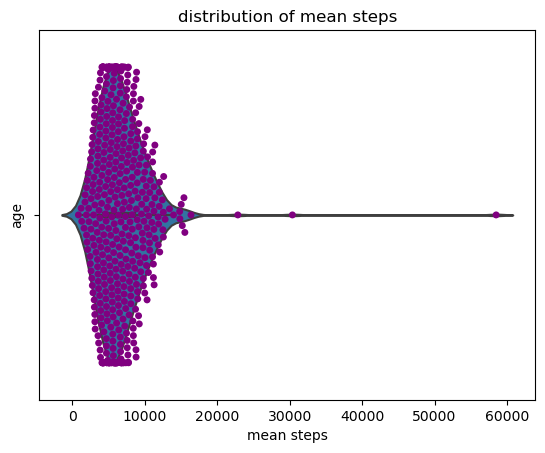

In [157]:
sns.violinplot(x="mean steps", data=df)
sns.swarmplot(df["mean steps"], color='purple') #default color doesn't stand out
plt.title("distribution of mean steps")
plt.ylabel("age")
plt.xlabel ("mean steps")
plt.show()

In [158]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,weigth,mean steps
count,929.000000,929.000000,929.000000,928.000000,923.00000,24.000000,243.000000,278.000000,296.000000,354.000000,...,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,927.000000,463.000000
mean,465.000000,2.342304,2.530678,171.668103,72.32286,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,72.833873,6746.391256
std,268.323499,1.226129,1.274491,9.080235,15.41824,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,25.902717,3909.569086
min,1.000000,1.000000,1.000000,145.000000,45.00000,164.000000,67.000000,25.000000,43.000000,11.000000,...,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,6.000000,842.000000
25%,233.000000,1.000000,1.000000,165.000000,61.00000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,61.000000,4529.683081
50%,465.000000,2.000000,2.000000,172.000000,71.00000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,71.000000,6125.060976
75%,697.000000,3.000000,4.000000,179.000000,81.00000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,81.000000,8318.496812
max,929.000000,11.000000,5.000000,195.000000,155.00000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,700.000000,58491.067568


In [ ]:

sns.lmplot(x="weight", y="mean steps", data=df) 
plt.xlabel("weight (in kg)") #use matplotlib to refine Seaborn plot
plt.ylabel("steps")
plt.title("steps taken in relation to weight")
plt.show()

There are a few things to note here:
1. First, the data seem to fit a linear pattern: a downwards trend
2. However, there is alot of variation around the line. 
3. The downwards trend tells: the heavier the people are the less steps they took. 

<AxesSubplot:xlabel='mean steps', ylabel='age'>

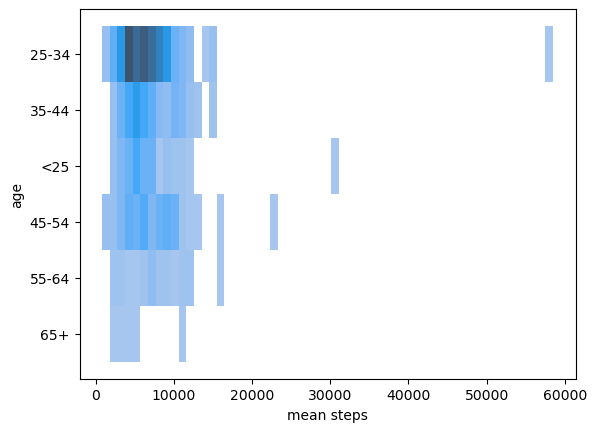

In [160]:
sns.histplot(data=df, x="mean steps", y="age", kde=True)

From the hisplot above it is easy to work out what the most steps taken is for each age group

In [ ]:
df.corr()

In [ ]:
x = df[["mean steps"]]
y = df["age", "weight"]
lm = LinearRegression()
lm = lm.fit(x, y)

In [ ]:
df["steps_p"]= lm.predict(x) #steps predict from mean
df.head()

In [ ]:
from sklearn.metrics import r2_score

r2_score(df["mean steps"], df["steps_p"])

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

sqrt(mean_squared_error(df["mean steps"], df["steps_p"]))

computer started overheating with running the code 